# *Manufacturing Root Cause (Group 3)*

Project developers:
- Amine Amri
- Julia Graham
- Sebastian Anusch
- Simone Assirelli 

In [68]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

Loading the data

In [69]:
url_defects = 'https://dl.dropboxusercontent.com/scl/fi/j3xred1cqmicuxui4kj6m/RC_DEFECTS_clean.csv?rlkey=gumwpqnsfvdyjdx5doi4i7zxb&dl=1'
url_production = 'https://dl.dropboxusercontent.com/scl/fi/baekmodofe2sn64qhrcur/RC_PRODUCTION_clean.csv?rlkey=uw7r9vgblez57cbnwsf2c3vmd&dl=1'
df_def = pd.read_csv(url_defects)
df_prod = pd.read_csv(url_production)

## 1. Exploring the data

In [70]:
print(df_def.shape)
df_def.head()

(617, 10)


,COIL,MT_FROM,MT_TO,DATE,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,389523,0.0,599.0,2019-03-01,0,0,1,0,0,0
1,389523,600.0,1457.0,2019-03-01,0,1,1,0,0,0
2,389528,0.0,1399.0,2019-03-01,0,0,1,0,0,0
3,389528,1400.0,1539.0,2019-03-01,0,0,1,0,1,0
4,389712,0.0,1374.0,2019-03-01,0,0,1,0,0,0


In [71]:
print(df_prod.shape)
df_prod.head()

(299384, 110)


,COIL,DATE,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,...,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
0,240627,2019-03-15,0.0,14:25:23.060,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,240627,2019-03-15,7.0,14:25:53.060,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,240627,2019-03-15,14.0,14:26:23.060,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,240627,2019-03-15,21.0,14:27:08.060,11.148851,671.631750,681.066000,679.704750,707.241375,727.886250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,240627,2019-03-15,28.0,14:27:38.060,15.657188,675.052875,686.972813,683.336250,710.432437,730.182375,...,530.110125,14.625,14.625,1956.40875,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# Columns of production dataframe
prod_columns = list(df_prod.columns)
print(prod_columns) 

['COIL', 'DATE', 'MT', 'TIME_START_PROCESS', 'SPEED_PROCESS', 'TEMP_Z1', 'TEMP_Z2', 'TEMP_Z3', 'TEMP_Z4', 'TEMP_Z5', 'TEMP_Z6', 'PYRO_1_PRECHMBR', 'PYRO_2_FRST_3_ZONE', 'PYRO_3_LST_3_ZONE', 'LS_OVEN', 'LASER_FRN_1', 'LASER_FRN_2', 'LASER_FRN_3', 'LASER_FRN_4', 'LASER_FRN_5', 'LASER_FRN_6', 'LASER_FRN_7', 'LASER_FRN_8', 'LASER_FRN_9', 'AIR_CH4_1', 'AIR_CH4_2', 'AIR_CH4_3', 'AIR_CH4_4', 'AIR_CH4_5', 'AIR_CH4_6', 'AIR_Z1_1', 'AIR_Z1_2', 'AIR_Z2_1', 'AIR_Z2_2', 'AIR_Z3_1', 'AIR_Z3_2', 'AIR_Z4_1', 'AIR_Z4_2', 'AIR_Z5_1', 'AIR_Z5_2', 'AIR_Z6_1', 'AIR_Z6_2', 'GAS_Z1_1', 'GAS_Z1_2', 'GAS_Z2_1', 'GAS_Z2_2', 'GAS_Z3_1', 'GAS_Z3_2', 'GAS_Z4_1', 'GAS_Z4_2', 'GAS_Z5_1', 'GAS_Z5_2', 'GAS_Z6_1', 'GAS_Z6_2', 'FRN_PHF_PRESSURE', 'FRN_FURNACE_PRESSURE', 'TIRO_FORNO', 'PRES_ZONA1_MEASURED', 'PRES_ZONA1_SET', 'PRES_ZONA2_MEASURED', 'PRES_ZONA2_SET', 'PRES_ZONA3_MEASURED', 'PRES_ZONA3_SET', 'EXT_1', 'EXT_2', 'VENT_1', 'VENT_2', 'VENT_3', 'VENT_4', 'VENT_5', 'COOL_1A', 'COOL_1B', 'COOL_2A', 'COOL_2B', 'COOL

In [73]:
df_prod.describe()

,COIL,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,...,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
count,2.993840e+05,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,...,283737.000000,283737.000000,283737.000000,283737.000000,270904.000000,270904.000000,270904.000000,270904.000000,270904.000000,270904.000000
mean,4.210808e+05,1013.750454,36.030174,1236.378668,1257.600788,1266.031784,1279.476562,1293.618170,1281.422092,802.675699,...,526.644078,18.292673,18.344328,3186.598116,39.900765,689.840763,3610.710095,0.532809,0.164599,0.169975
std,2.484114e+05,874.832131,11.243607,87.092407,87.833443,87.717798,85.313536,88.576110,84.233837,38.910802,...,34.108621,2.699142,2.794101,1306.570596,17.267686,279.623230,982.734142,0.232301,0.040681,0.038671
min,2.406270e+05,0.000000,-2.304028,79.722742,74.225453,74.198610,77.426415,78.567278,79.205925,549.382500,...,-3.665034,0.000000,0.000000,856.680000,-1.809788,-496.040375,-48.285825,0.000000,-0.011853,-0.016642
25%,3.947170e+05,378.000000,28.063851,1236.605625,1259.813250,1271.021625,1260.090000,1261.445625,1271.056781,795.292844,...,529.919898,16.875000,16.875000,2333.722500,28.351013,496.627351,2946.052969,0.470936,0.134999,0.135002
50%,4.037420e+05,812.000000,33.685521,1261.473750,1272.760476,1278.000540,1286.188125,1317.151607,1293.406875,811.525114,...,530.125500,18.000000,18.000000,2901.962812,37.656312,662.102578,3790.602141,0.559548,0.135037,0.161994
75%,4.146100e+05,1400.000000,44.908965,1270.924798,1293.924375,1303.419825,1316.148750,1333.189687,1313.704765,823.938673,...,530.315100,20.248013,20.250000,4021.551000,49.828513,837.825196,4217.453156,0.572413,0.188993,0.189022
max,6.838679e+06,7273.000000,67.408785,1322.268750,1344.982500,1357.508250,1348.341750,1367.288438,1362.536250,931.753875,...,541.123650,31.405500,32.747692,9073.901250,90.010696,2933.876250,6257.584687,7.342893,0.679614,0.324028


#### Adjustment of the 'MT' column
Since there are inconsistencies along the 'MT' column, i.e. there are coils with an inconsistent sequence of meters, we addressed this problem by creating a new variable 'MT_ADJUSTED' that ensures a correct sequence of meters (one observation every 7 meters)

In [74]:
df_prod.sort_values(['COIL', 'DATE', 'TIME_START_PROCESS'], inplace=True)
df_prod['MT_ADJUSTED'] = df_prod.groupby(['COIL'])['MT'] \
                          .transform(lambda x: np.arange(0., len(x) * 7, 7.))
df_prod.drop('MT', axis=1, inplace=True)

## 2. Merging procedure

Attaching production information only over coils with defects

In [75]:
merged_defects = df_prod.merge(df_def, on=['COIL', 'DATE'], how='inner') # By doing so you obtain only the 
                                                                         # observations with defects
print(merged_defects.shape)

merged_defects = merged_defects[(merged_defects['MT_ADJUSTED'] >= merged_defects['MT_FROM']) & 
                      (merged_defects['MT_ADJUSTED'] < merged_defects['MT_TO'])] # This filtering is needed as you 
                                                                                 # want to specify that 
                                                                                 # 'MT_ADJUSTED' must be be found 
                                                                                 # inside the defect range 
merged_defects.drop_duplicates(['COIL', 'DATE', 'MT_ADJUSTED'], inplace=True)
merged_defects.drop(['MT_FROM', 'MT_TO'], axis=1, inplace=True)
print(merged_defects.shape)

(131179, 118)
(106075, 116)


In [76]:
lst_col_labels = ['COIL', 'DATE', 'MT_ADJUSTED']+[i for i in merged_defects.columns if 'DIF_TIPO' in i]
merged_defects = merged_defects[lst_col_labels]
merged_final = df_prod.merge(merged_defects, on = ['COIL', 'DATE', 'MT_ADJUSTED'], how='left')
merged_final.head()

,COIL,DATE,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,...,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG,MT_ADJUSTED,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,240627,2019-03-15,14:25:23.060,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,734.603062,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,240627,2019-03-15,14:25:53.060,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,727.025625,...,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,240627,2019-03-15,14:26:23.060,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,724.035750,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
3,240627,2019-03-15,14:27:08.060,11.148851,671.631750,681.066000,679.704750,707.241375,727.886250,723.072375,...,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
4,240627,2019-03-15,14:27:38.060,15.657188,675.052875,686.972813,683.336250,710.432437,730.182375,724.168688,...,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN


After this process, merged_df contains the production data with defect information correctly applied. Each row in 'merged_final' represents production data, and if there were any defects associated with the particular meter range of a coil, this information is now included in the corresponding rows.

Downloading the merged data in a csv format (in case you want to visualize it on Excel) \
P.S. Do not run this if you don't want to download it!

In [77]:
# ! pip install openpyxl
# merged_df.to_excel('merged_data.xlsx', index=False, engine='openpyxl')

## 3. Dealing with missing Values

Question: Are there missing values in the ['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6'] columns?

In [78]:
merged_final[['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 
           'DIF_TIPO_5', 'DIF_TIPO_6']].isna().sum()

DIF_TIPO_1    193309
DIF_TIPO_2    193309
DIF_TIPO_3    193309
DIF_TIPO_4    193309
DIF_TIPO_5    193309
DIF_TIPO_6    193309
dtype: int64

Answer: Yes. Therefore, we need to convern Null values to 0s for observations that have no defects

In [79]:
# List of defect columns - replace or extend this with your actual defect column names
defect_columns = ['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']

# Replace NaN values with 0 in defect columns
for col in defect_columns:
    merged_final[col] = merged_final[col].fillna(0)

merged_final[['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 
           'DIF_TIPO_5', 'DIF_TIPO_6']].isna().sum()

DIF_TIPO_1    0
DIF_TIPO_2    0
DIF_TIPO_3    0
DIF_TIPO_4    0
DIF_TIPO_5    0
DIF_TIPO_6    0
dtype: int64

In [80]:
# Checking overall missing values
merged_final.isna().sum().sum()

908899

Let's visualize missing values with a bar chart

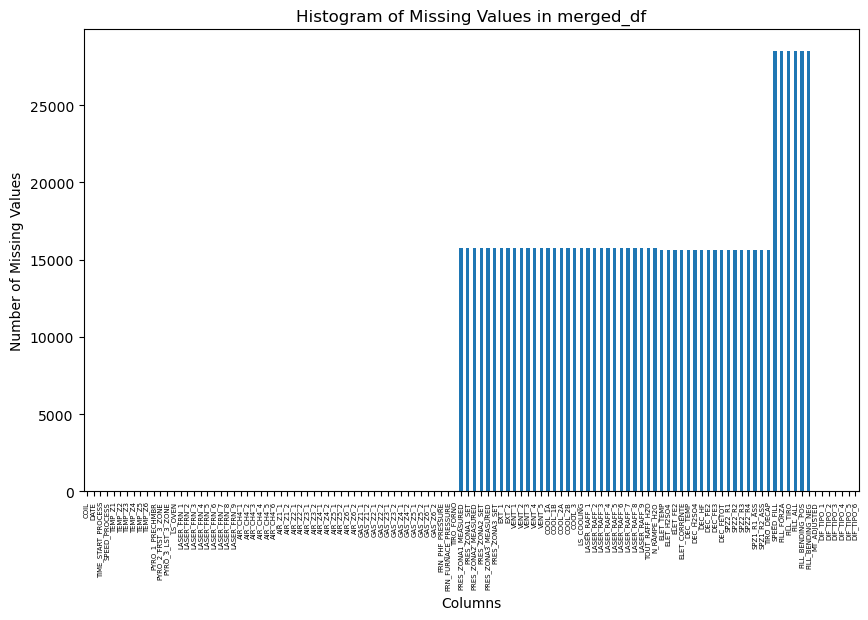

In [81]:
missing_values = merged_final.isna().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Histogram of Missing Values in merged_df')
plt.xticks(rotation=90, fontsize = 5)
plt.show()

We decided to procceed with eliminating the columns with too many missing values. This step is crucial as it helps us in reducing dimensionality and also improves model performance by removing irrelevant features. 
We decided to eliminate 6 columns, namely ['SPEED_FILL', 'FILL_FORZA', 'FILL_TIRO', 'FILL_ALL', 'FILL_BENDING_POS', 'FILL_BENDING_NEG']

In [82]:
merged_final.drop(['SPEED_FILL', 'FILL_FORZA', 'FILL_TIRO', 'FILL_ALL', 'FILL_BENDING_POS', 'FILL_BENDING_NEG'],\
                   axis=1, inplace=True)


## 4. Dimensionality Reduction

In [83]:
##                           PCA

# # # Dropping non-numeric columns if any
# numeric_data = merged_df.select_dtypes(include=[np.number])

# # # Replace NaN values with the mean of each column
# numeric_data_filled = numeric_data.fillna(numeric_data.mean())
# # For replacing missing values with the mean of the column
# imputer = SimpleImputer(strategy='mean')
# # Assuming numeric_data is your dataset with missing values
# imputer.fit(numeric_data)
# numeric_data_transformed = imputer.transform(numeric_data)

# # create a PCA 

# scaler = StandardScaler() 
# data_std = scaler.fit_transform(numeric_data_transformed)
# pca = PCA()
# pca.fit(data_std)
# print(pca.explained_variance_ratio_.cumsum())

# # # Applying PCA
# pca = PCA(n_components=49)  # This retains 95% of the variance
# principal_components = pca.fit_transform(numeric_data_transformed)

# # # Transform data to DataFrame
# principal_df = pd.DataFrame(data=principal_components)

# # # Plotting the explained variance
# plt.figure(figsize=(8, 4))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance by PCA Components')
# plt.grid(True)
# plt.show()

## 5. 